In [1]:
# ! pip install librosa
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import numpy as np
import os

In [2]:
filename='/media/jeya/DRIVE_B/PROJECTS/file_example_WAV_5MG.wav'
# filename='/home/jeya/Desktop/music_dataset/Data/genres_original/blues/blues.00000.wav'

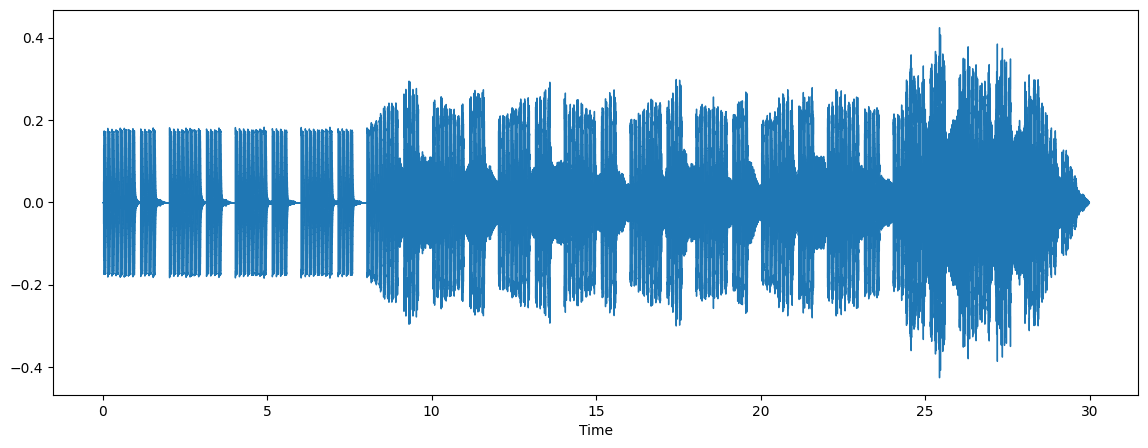

In [3]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)


In [4]:
sample_rate
#22050

22050

In [5]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=70)
print(mfccs.shape)
#(50, 1293)

(70, 1292)


In [6]:
mfccs

array([[-4.8211847e+02, -4.5974731e+02, -5.0928864e+02, ...,
        -5.7240973e+02, -5.8314478e+02, -5.9470941e+02],
       [ 1.5463733e+02,  1.7385687e+02,  1.3177324e+02, ...,
         5.6419510e+01,  4.2282310e+01,  2.6488634e+01],
       [ 8.8164787e+01,  8.8333969e+01,  9.3517815e+01, ...,
         5.0977673e+01,  3.9608772e+01,  2.5411545e+01],
       ...,
       [-3.7328926e-01, -1.1196427e+00, -2.0030677e+00, ...,
        -2.4899862e+00, -3.6006079e+00, -2.9117422e+00],
       [-3.8711327e-01, -1.0253427e+00, -1.6994200e+00, ...,
        -2.8701899e+00, -3.5859580e+00, -3.0911837e+00],
       [-3.3202976e-01, -8.3593118e-01, -1.2935331e+00, ...,
        -3.5346420e+00, -3.5025535e+00, -3.2038031e+00]], dtype=float32)

In [7]:
audio_dataset_path='/home/jeya/Desktop/music_dataset/Data/genres_original'
metadata=pd.read_csv('/home/jeya/Desktop/music_dataset/Data/features_30_sec.csv')
metadata.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

In [8]:
def features_extractor(file,input_feature):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=input_feature)
    # print("mfccs_features",mfccs_features.shape)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    # print("mfccs_scaled_features",mfccs_scaled_features.shape)
    #mfccs_features (50, 1293),30 second files of audio
    #mfccs_scaled_features (50,)
    return mfccs_scaled_features

In [9]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    # print("row",row)
    # print("audio_dataset_path",audio_dataset_path)
    folder_name=str(row["label"])
    # print("folder name",folder_name)
    file_name=str(row["filename"])
    # print("file name",file_name)

    fil_name=f'{folder_name}/{file_name}'
    # print("folder +file name",fil_name)
    file_name = os.path.join(os.path.abspath(audio_dataset_path),fil_name)
    # print("file name",file_name)
    final_class_labels=row["label"]
    try:
        input_features=70# inputs feature for the model specified theresssss
        data=features_extractor(file_name,input_feature=input_features)
    except:
        pass
    extracted_features.append([data,final_class_labels])

552it [00:10, 56.45it/s]/tmp/ipykernel_383987/3492905821.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
/media/jeya/DRIVE_B/PROJECTS/ENV/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
1000it [00:18, 53.50it/s]


In [10]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
# extracted_features_df.tail(100)
print(set(extracted_features_df["class"]))

{'jazz', 'reggae', 'hiphop', 'rock', 'pop', 'disco', 'country', 'blues', 'metal', 'classical'}


In [11]:
len(extracted_features_df.feature[1])

70

In [12]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [13]:
X.shape,y.shape

((1000, 70), (1000,))

In [14]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

2024-11-25 17:24:17.675134: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-25 17:24:17.681664: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-25 17:24:17.688657: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-25 17:24:17.690692: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-25 17:24:17.697035: I tensorflow/core/platform/cpu_feature_guar

In [15]:
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 70), (800, 10), (200, 70), (200, 10))

In [18]:
len(X_train[0])

70

In [19]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [20]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
# from tensorflow.keras.optimizers import Adam
# from sklearn import metrics

In [21]:
### No of classes
num_labels=y.shape[1]
num_labels

10

In [22]:
input_dim=input_features

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, BatchNormalization, Activation

model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(input_dim, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(LSTM(128, return_sequences=False))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(num_labels, activation='softmax'))


/media/jeya/DRIVE_B/PROJECTS/ENV/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1732535658.442130  383987 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-25 17:24:18.461498: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libr

In [24]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 68, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 34, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 34, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 32, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 14, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 339,978 (1.30 MB)

 Trainable params: 339,210 (1.29 MB)

 Non-trainable params: 768 (3.00 KB)

In [25]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [26]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 8

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
 97/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1530 - loss: 2.2678
Epoch 1: val_loss improved from inf to 1.95839, saving model to saved_models/audio_classification.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1557 - loss: 2.2638 - val_accuracy: 0.3400 - val_loss: 1.9584
Epoch 2/200
 85/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2961 - loss: 1.9311
Epoch 2: val_loss improved from 1.95839 to 1.92439, saving model to saved_models/audio_classification.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2954 - loss: 1.9315 - val_accuracy: 0.3650 - val_loss: 1.9244
Epoch 3/200
 82/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3633 - loss: 1.8301
Epoch 3: val_loss improved from 1.92439 to 1.77764, saving model to saved_models/audio_classification.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3655 - loss: 1.8257 - val_accuracy: 0.3500 - val_loss: 1.7776
Epoch 4/200
 84/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4

In [27]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.6100000143051147


In [28]:
X_test[1]


array([-9.3518982e+01,  8.0199570e+01, -3.2109228e-01,  1.5246740e+01,
        4.3359027e+00,  9.0500536e+00,  1.6788752e+00,  2.5456698e+00,
       -4.2962642e+00,  9.9933988e-01, -1.6968484e+00, -2.9973221e+00,
        2.2623456e+00, -2.0905139e+00,  3.2001770e-01, -4.3863263e+00,
       -4.0574255e+00, -3.1715336e+00, -5.4251657e+00, -2.1440194e+00,
        1.2108918e+00,  1.4755818e+00,  7.6801544e-01, -1.9554248e+00,
       -1.6520017e-01,  6.4386815e-01, -2.0543337e+00, -2.4128513e+00,
       -1.7979860e+00,  4.0277953e+00,  3.1345446e+00, -7.6363131e-02,
       -4.7433429e+00, -5.1944160e+00, -2.5531704e+00, -1.7778822e+00,
       -2.3744776e+00, -2.2876654e+00, -1.4052083e+00, -6.1548084e-01,
       -3.2005680e+00, -3.5161190e+00, -3.4299011e+00,  6.0174847e-01,
       -5.6200469e-01,  1.9910629e+00,  2.7912798e+00, -1.9127386e+00,
       -7.1205754e+00, -4.5691152e+00,  6.8442178e-01, -1.7998198e+00,
       -5.1662326e+00, -4.0640492e+00, -3.1403234e+00, -1.0275750e+00,
      

In [29]:
X_test.shape

(200, 70)

In [30]:
X_test[0]

array([-1.14785721e+02,  1.19293335e+02, -5.07344971e+01,  4.26241608e+01,
       -6.70160627e+00,  1.97079868e+01, -1.68835888e+01,  1.93940086e+01,
       -1.74104271e+01,  1.73029079e+01, -1.08727913e+01,  6.65783691e+00,
       -1.57666645e+01,  3.54626441e+00, -7.76578522e+00,  3.38360333e+00,
       -7.69369459e+00,  1.61169124e+00, -1.07089376e+01, -5.41984558e-01,
       -3.24941015e+00, -7.40381432e+00, -8.88473892e+00, -1.38062572e+00,
       -4.27921629e+00, -1.87524962e+00,  1.81428015e+00, -1.83372009e+00,
        3.57499743e+00,  6.16292953e-01, -3.65166092e+00, -8.51044273e+00,
       -3.73111892e+00, -4.39396191e+00,  1.46996820e+00,  2.11350775e+00,
        5.94194651e-01, -3.11244774e+00,  1.76092386e+00,  5.08157089e-02,
       -2.89810753e+00, -4.73752880e+00, -1.61673999e+00, -4.64745426e+00,
       -1.07944047e+00, -6.60761520e-02, -4.92271566e+00, -5.90343952e+00,
        2.00931740e+00, -5.95740415e-02, -4.33860588e+00, -5.30406475e+00,
        6.78108156e-01,  

In [31]:
x_test=np.expand_dims(X_test[0],axis=0)
x_test.shape

(1, 70)

In [32]:
out=model.predict(x_test)
out.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


(1, 10)

In [34]:

max_index = np.argmax(out)

prediction_class = labelencoder.inverse_transform([max_index]) 
prediction_class

array(['hiphop'], dtype='<U9')

In [50]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the .keras model
model_path = "/media/jeya/DRIVE_B/PROJECTS/ENV/saved_models/audio_classification.keras"
model = load_model(model_path)

# filename='/media/jeya/DRIVE_B/PROJECTS/file_example_WAV_5MG.wav'
filename='/home/jeya/Desktop/music_dataset/Data/genres_original/metal/metal.00000.wav'
data,sample_rate=librosa.load(filename)
mfccs_features = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=50)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
print(mfccs_scaled_features.shape)
input_data=np.expand_dims(mfccs_scaled_features,axis=0)

predictions = model.predict(input_data)

# Output prediction
print("Predictions:", predictions)

# Get the class index with the highest probability
predicted_class = np.argmax(predictions, axis=1)

print("prediction class",predicted_class)

prediction_class = labelencoder.inverse_transform([predicted_class]) 
print("Predicted Class:", prediction_class)


names=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
predicted_label=names[predicted_class[0]]


print("predcited classs through list",predicted_label)


(50,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Predictions: [[1.7573463e-02 9.1100381e-05 3.3795083e-04 1.7496411e-02 7.2854939e-03
  6.6099496e-04 9.5100629e-01 4.2326133e-06 4.3887942e-04 5.1052123e-03]]
prediction class [6]
Predicted Class: ['metal']
predcited classs through list metal


/media/jeya/DRIVE_B/PROJECTS/ENV/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
names=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
predicted_label=names[0]